In [2]:
import pandas as pd
import numpy as np
import re

### Dataset 1:'all_opinion.csv'---df
load the opinion files transformed from opinion_6398, ..., opinion_6409, and combine them together as 'all_opinion.csv'
- 846 unique last_name
- 1446 unique full_name
- 165 unique district
- 107038 rows

In [52]:
#df = pd.read_csv('opinion_6398.csv',index_col=0 )
#for i in range(6399,6410):
#    data = pd.read_csv('opinion_'+str(i)+'.csv',index_col=0)
#    df = pd.concat([df, data])
#df.district.apply(lambda x: x.replace("'","").replace("{","").replace("}","").replace(",","").lower()).unique()
#df.to_csv('all_opinion.csv')

In [304]:
df = pd.read_csv('all_opinion.csv',index_col=0)

In [305]:
df.head()

,district,from,full_name,judge,opinion
0,"['western', 'new', 'york']",6398,carl l bucki,bucki,"Bucki, Chief U.S.B.J., W.D.N.Y. The Chapter 7 ..."
4,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,It appearing that the debtor(s) is entitled to...
15,"['eastern', 'new', 'york']",6398,nancy hershey lord,lord,HONORABLE NANCY HERSHEY LORD UNITED STATES BAN...
16,"['southern', 'new', 'york']",6398,martin glenn,glenn,Pending before the Court is the In response t...
18,['connecticut'],6398,albert s dabrowski,dabrowski,"After notice and a hearing held July 24, 2014 ..."


count for the unique values groupby 'judge'

In [310]:
df_judge_unique = df.groupby('judge').nunique()
df_judge_unique[df_judge_unique.full_name > 1].head()

,district,from,full_name,judge,opinion
judge,,,,,
abel,1,1,2,1,9
abram,1,2,4,1,9
abramson,1,1,3,1,17
adams,1,1,2,1,38
adler,1,1,3,1,29


In [121]:
len(df_judge_unique[df_judge_unique.full_name>1]), len(df_judge_unique[df_judge_unique.full_name==1]),len(df_judge_unique)

(368, 478, 846)

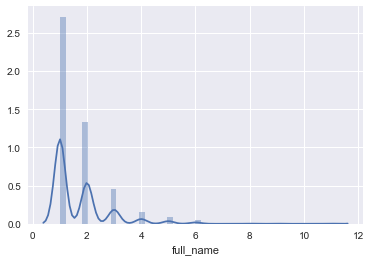

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df_judge_unique.full_name)
#plt.xlim(xmin = 0, xmax = 0.0002)
plt.show()

the amount of different full name with the same last name

In [139]:
df_judge_unique.groupby('full_name').size()

full_name
1     478
2     234
3      81
4      27
5      15
6       8
8       1
9       1
11      1
dtype: int64

In [144]:
df_judge_unique[df_judge_unique.full_name.isin([6,8,9,11])]

,district,from,full_name,judge,opinion
judge,,,,,
brown,11,6,11,1,628
clark,6,3,8,1,231
davis,4,5,6,1,99
hon,9,7,6,1,43
howard,2,1,6,1,581
jones,5,3,6,1,214
mahoney,7,5,6,1,277
robinson,5,4,6,1,70
shiff,5,3,6,1,547


## Dataset 2:  'all_opinion_abbr.csv'---df_abbr
load the opinion data with abbr for district and generate 'judge-district' pair. 
- 1131 unique judge-district pair

In [164]:
df_abbr = pd.read_csv('all_opinion_abbr.csv',index_col=0) #1131 unique judge-district pair

In [184]:
#df_abbr['judge_dist'] = df_abbr.judge+' '+df_abbr.abbr
#df_abbr = df_abbr.drop('Unnamed: 0.1', axis=1)
df_abbr.head()
#df_abbr.judge_dist.nunique()

,district,from,full_name,judge,opinion,abbr,judge_dist
0,"['western', 'new', 'york']",6398,carl l bucki,bucki,"Bucki, Chief U.S.B.J., W.D.N.Y. The Chapter 7 ...",nywb,bucki nywb
1,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,It appearing that the debtor(s) is entitled to...,nyeb,stong nyeb
2,"['eastern', 'new', 'york']",6398,nancy hershey lord,lord,HONORABLE NANCY HERSHEY LORD UNITED STATES BAN...,nyeb,lord nyeb
3,"['southern', 'new', 'york']",6398,martin glenn,glenn,Pending before the Court is the In response t...,nysb,glenn nysb
4,['connecticut'],6398,albert s dabrowski,dabrowski,"After notice and a hearing held July 24, 2014 ...",ctb,dabrowski ctb


## Dataset 3:  'dist_judge_unique.csv'---dist_df
load the unique district and judge last name occuered in decision data, and create 'judge-district' pair
- 712 unique judge-district pair

In [172]:
dist_df = pd.read_csv('dist_judge_unique.csv',index_col=0 ) #712 unique judge-district pair
#dist_df.judge = dist_df.judge.apply(lambda x:x.lower())
#dist_df['judge_dist'] = dist_df.judge+' '+dist_df.district

In [311]:
dist_df.head()

,district,judge,judge_dist
0,scb,duncan,duncan scb
1,ilcb,gorman,gorman ilcb
2,innb,rodibaugh,rodibaugh innb
3,deb,katz,katz deb
4,laeb,none,none laeb


## Dataset 4: 'judge_opinion.csv'——judge_opinion
Compute the intersection of 'judge-district' pairs occured in both opinion data and decision data————'judge_inter'
- 487 judge-district pair in opinion and decision

Select the data from 'all_opinion_abbr.csv' with the 'judge-district' pairs in 'judge_inter', and create 'judge_opinion.csv'.the opinion data with the 'judge-dist' in both the opinion dataset and the decision dateset has:
- 64939(65213) rows 
- 486 unique judge-district pair
- 412 unique last name
- 757 unique full name
- 73 unique districts
- 60 judge-district pair with mutiple full-name

(remove the row with last name='gregg', bucause matiple judges with the same last name and same district)

In [188]:
judge_inter = set(df_abbr.judge_dist.unique()).intersection(set(dist_df.judge_dist.unique()))  

In [195]:
judge_opinion = df_abbr[df_abbr['judge_dist'].isin(judge_inter)]

In [196]:
judge_opinion.head()

,district,from,full_name,judge,opinion,abbr,judge_dist
0,"['western', 'new', 'york']",6398,carl l bucki,bucki,"Bucki, Chief U.S.B.J., W.D.N.Y. The Chapter 7 ...",nywb,bucki nywb
1,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,It appearing that the debtor(s) is entitled to...,nyeb,stong nyeb
3,"['southern', 'new', 'york']",6398,martin glenn,glenn,Pending before the Court is the In response t...,nysb,glenn nysb
5,"['southern', 'new', 'york']",6398,shelley c chapman,chapman,"""It's not even close."" So said Sabine's Chief ...",nysb,chapman nysb
6,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,"More than five years ago, on July 6, 2011, USA...",nyeb,stong nyeb


In [227]:
jj = judge_opinion.groupby('judge_dist').nunique()
jj[jj.full_name>2].judge_dist.keys()

Index(['abramson txnb', 'adler casb', 'balick deb', 'barliant ilnb',
       'bishop scb', 'bostetter vaeb', 'boulden utb', 'bowie casb',
       'brahney laeb', 'briskman alsb', 'brown laeb', 'brown tnwb',
       'bufford cacb', 'chinen hib', 'clark ohsb', 'clevert wieb',
       'drake ganb', 'ecker sdb', 'felsenthal txnb', 'gerling nynb',
       'goldwater nvb', 'grant innb', 'graves mieb', 'gregg miwb', 'hale txnb',
       'hedrick caeb', 'hess orb', 'hopkins ohsb', 'houston msnb',
       'howard kyeb', 'howard miwb', 'hyman flsb', 'jaroslovsky canb',
       'jernigan txnb', 'jones nvb', 'kahn ganb', 'keir mdb', 'kingsmill laeb',
       'klein caeb', 'mannes mdb', 'marro vtb', 'murphy ganb', 'pappas idb',
       'perris orb', 'ray flsb', 'rhodes mieb', 'schmetterer ilnb',
       'scott areb', 'sellers ohsb', 'shannon deb', 'sigmund paeb',
       'sledge alnb', 'sontchi deb', 'speer ohnb', 'stair tneb',
       'stevenson miwb', 'tchaikovsky canb', 'twardowski paeb', 'white ohnb',
     

In [229]:
for i in jj[jj.full_name>2].judge_dist.keys():
    print(i, judge_opinion[judge_opinion.judge_dist==i].full_name.unique())

abramson txnb ['abramson' 'harold c abramson' 'harold abramson']
adler casb ['adler' 'loe decarl adler' 'de carl adler']
balick deb ['helen s balick' 'balick' 'helen balick' 'helen s balick j']
barliant ilnb ['ronald barliant' 'barliant' 'ronald s barliant']
bishop scb ['wm thurmond bishop' 'william thurmond bishop' 'thurmond bishop' 'bishop']
bostetter vaeb ['martin vb bostetter' 'martin v b bostetter' 'bostetter']
boulden utb ['judith a boulden' 'boulden' 'ju5dith a boulden']
bowie casb ['peter w bowie' 'peter wentworth bowie' 'bowie']
brahney laeb ['thomas m brahney' 't m brahney' 'jm brahney']
briskman alsb ['briskman' 'arthur r briskman' 'arthur b briskman']
brown laeb ['jerry a brown' 'brown' 'ja brown']
brown tnwb ['brown' 'william houston brown' 'william h brown']
bufford cacb ['samuel l bufford' 'samuel bufford' 'bufford']
chinen hib ['jon j chinen' 'john j chinen' 'jon chinen']
clark ohsb ['william a clark' 'william m clark' 'clark']
clevert wieb ['c n clevert' 'cn clevert' '

In [313]:
gg = judge_opinion.groupby('judge').nunique()
gg[gg.district>1].head()

,district,from,full_name,judge,opinion,abbr,judge_dist
judge,,,,,,,
akard,2,2,2,1,33,2,2
altenberger,2,1,2,1,48,2,2
baxter,2,2,2,1,93,2,2
bernstein,2,2,2,1,173,2,2
bohanon,3,3,2,1,145,3,3


In [260]:
#for i in gg[gg.district>1].judge.keys():
#    print(i, judge_opinion[judge_opinion.judge==i][['full_name','abbr']].apply(tuple,axis=1).unique())

In [265]:
judge_opinion.head()

,district,from,full_name,judge,opinion,abbr,judge_dist
0,"['western', 'new', 'york']",6398,carl l bucki,bucki,"Bucki, Chief U.S.B.J., W.D.N.Y. The Chapter 7 ...",nywb,bucki nywb
1,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,It appearing that the debtor(s) is entitled to...,nyeb,stong nyeb
3,"['southern', 'new', 'york']",6398,martin glenn,glenn,Pending before the Court is the In response t...,nysb,glenn nysb
5,"['southern', 'new', 'york']",6398,shelley c chapman,chapman,"""It's not even close."" So said Sabine's Chief ...",nysb,chapman nysb
6,"['eastern', 'new', 'york']",6398,elizabeth s stong,stong,"More than five years ago, on July 6, 2011, USA...",nyeb,stong nyeb


In [262]:
judge_opinion=judge_opinion[judge_opinion.judge!='gregg']

In [264]:
judge_opinion.to_csv('judge_opinion.csv')

## Dataset 4.1 : 'judge_opinion_truc.csv'——df_truc
trcated the judge_opinion data into a dataset with only 2 columns:judge_dist	opinions
- 64939 rows
- 486 unique 'judge-district' pairs

this dataset could be used to calculate the opinions of each judge, and merge the opinions from same judge

In [319]:
#df_truc = pd.DataFrame({'judge_dist': judge_opinion.judge_dist,'opinion': judge_opinion.opinion})
#df_truc.to_csv('judge_opinion_truc.csv')
df_truc = pd.read_csv('judge_opinion_truc.csv', index_col = 0)
df_truc.head()

,judge_dist,opinion
0,bucki nywb,"Bucki, Chief U.S.B.J., W.D.N.Y. The Chapter 7 ..."
1,stong nyeb,It appearing that the debtor(s) is entitled to...
3,glenn nysb,Pending before the Court is the In response t...
5,chapman nysb,"""It's not even close."" So said Sabine's Chief ..."
6,stong nyeb,"More than five years ago, on July 6, 2011, USA..."


## Dataset 5 : 'merged_opinions.csv'——judge_opinions
calculate the amount of opinions of different 'judge-district' pairs

transfer the opinions into lowercase and merge them together
- 486 unique 'judge-district' pairs
- 64939 opinions in sum

this dataset id used for tf-idf representation for each judge

In [328]:
#g = df_truc.groupby('judge_dist')
#judge_opinions = {}
#for i in g.groups.keys():
#    judge_opinions[i] = [df_truc.opinion[i] for i in g.groups[i]]
#judge_opinions = pd.DataFrame(list(judge_opinions.items()), columns=['judge_dist', 'opinions'])
#judge_opinions['num_opinions'] = judge_opinions['opinions'].apply(lambda x: len(x))
#judge_opinions.opinions = judge_opinions.opinions.apply(lambda x: re.sub( '\s+',' ',re.sub(r'[^\w]|\d', ' ',str(x).lower())))
#judge_opinions.to_csv('merged_opinions.csv')
judge_opinions = pd.read_csv('merged_opinions.csv', index_col=0)

In [329]:
judge_opinions.head()

,judge_dist,opinions,num_opinions
0,abel txeb,before the court is a motion for contempt and...,14
1,abramson txnb,came on for hearing on the th day of october ...,35
2,adams vaeb,this matter comes before the court on ehrenfr...,73
3,adler casb,alfred and ruth nadel judicial lien holders f...,64
4,agresti pawb,presently before the court in response to the...,38


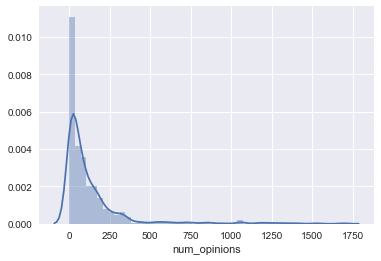

In [332]:
sns.set(color_codes=True)
sns.distplot(judge_opinions.num_opinions)
plt.show()

## TF-IDF representation

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokenize = lambda doc: doc.lower().split(" ")

In [7]:
judge_opinions = pd.read_csv('merged_opinions.csv', index_col=0)
judge_opinions.head()

,judge_dist,opinions,num_opinions
0,abel txeb,before the court is a motion for contempt and...,14
1,abramson txnb,came on for hearing on the th day of october ...,35
2,adams vaeb,this matter comes before the court on ehrenfr...,73
3,adler casb,alfred and ruth nadel judicial lien holders f...,64
4,agresti pawb,presently before the court in response to the...,38


In [20]:
all_opinions = [judge_opinions.opinions[i] for i in range(len(judge_opinions))]

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)
opinions_tfidf = sklearn_tfidf.fit_transform(all_opinions)

- 86253 features in the tf-idf 

In [52]:
len(sklearn_tfidf.get_feature_names())

86253

In [33]:
opinions_tfidf[0]

<1x86253 sparse matrix of type '<class 'numpy.float64'>'
	with 1796 stored elements in Compressed Sparse Row format>

In [34]:
opinions_tfidf.toarray()[0].tolist()

86253

## Dataset 6:'opinions_tfidf.csv'--df_idf
the tf-idf representation for opinions. tf-idf for different judges is normalized with tf-idf=td*idf/num_opinions
- 486 rows(judge-district)
- 86253 columns(features)

the features are then selected by the tf-idf value

In [81]:
df_idf = pd.DataFrame(columns =judge_opinions.judge_dist)
for i,j in enumerate(df_idf.columns):
    df_idf[j] = opinions_tfidf.toarray()[i].tolist()/judge_opinions.num_opinions[i]
df_idf = df_idf.transpose()
df_idf.columns= sklearn_tfidf.get_feature_names()

In [82]:
df_idf.to_csv('opinions_tfidf.csv')

In [85]:
df_idf = pd.read_csv('opinions_tfidf.csv', index_col = 0)

In [84]:
df_idf.head()

,,_,__,___,_csv,_exh,a,aa,aaa,aaaa,...,µg,à,á,österreichische,şekilde,şubeniz,δip,π,ߞ,荤
judge_dist,,,,,,,,,,,,,,,,,,,,,
abel txeb,0.000478,0.0,0.0,0.0,0.0,0.0,0.002089,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abramson txnb,0.000160,0.0,0.0,0.0,0.0,0.0,0.000768,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adams vaeb,0.000055,0.0,0.0,0.0,0.0,0.0,0.000280,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adler casb,0.000070,0.0,0.0,0.0,0.0,0.0,0.000351,0.000372,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agresti pawb,0.000107,0.0,0.0,0.0,0.0,0.0,0.000546,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


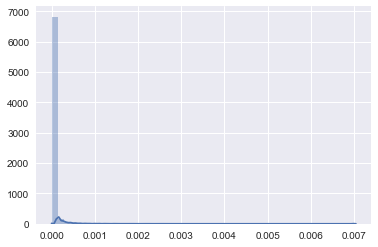

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df_idf.mean())
plt.show()

In [135]:
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to /Users/xinguan/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Feature Selection

Remove the features which are not english words or letter
- 23882 features

In [228]:
eng_feature = set(df_idf.columns).intersection(set(words.words()))
eng_feature = eng_feature - set([i for i in list(eng_feature) if len(i) == 1])

## Dataset 7:'opinions_tfidf_filter.csv'--df_idf_filter
Remove the features which are not english words or letter
- 23882 features

$log(tfidf+1)+10$

In [239]:
df_idf_filter = df_idf[list(eng_feature)]

In [309]:
df_idf_filter.to_csv('opinions_tfidf_filter1.csv')

In [252]:
df_idf_filter.solidarily[df_idf_filter['solidarily']!=0]

judge_dist
magner laeb    0.000069
Name: solidarily, dtype: float64

#### feature with only one non-zero values. (first 100 features)
- 5920 features with only one non-zero values.

In [313]:
print([i for i in list(eng_feature) if len(df_idf_filter[i].nonzero()[0])==1 ][:100]) #5920

['swam', 'defrost', 'slugged', 'begum', 'cornea', 'cordoba', 'inquisition', 'amen', 'perchloroethylene', 'puny', 'accredit', 'whiskey', 'dude', 'unmerchantable', 'timbered', 'cade', 'pooh', 'pervasion', 'amotion', 'behooves', 'rebilling', 'arduously', 'alphabetic', 'cellist', 'ennui', 'callousness', 'intramuscularly', 'unison', 'unspent', 'republish', 'lemming', 'sprinkle', 'bonderman', 'limper', 'darst', 'sailfish', 'sear', 'punta', 'pasha', 'dern', 'quintin', 'tarnishment', 'paperback', 'wark', 'pauperism', 'ignominy', 'delusion', 'hairdressing', 'timer', 'pacemaker', 'autocratic', 'inclusively', 'mending', 'harrowing', 'investible', 'reiterative', 'thy', 'benne', 'caterer', 'scrolled', 'precipitation', 'ultrasonic', 'evacuation', 'toiled', 'affray', 'interpretatively', 'misquotation', 'throttling', 'momentary', 'reciprocation', 'oii', 'wariness', 'gaby', 'wiliness', 'granger', 'casse', 'bulger', 'incubate', 'unfroze', 'taller', 'agar', 'cameo', 'attar', 'digested', 'sune', 'anodyne'

#### use the mean of values to filter out common words.
- mean>0.002, 54 words
- mean>0.0015, 103 words
- mean>0.001, 203 words
- mean>0.0005, 554 words
- mean>0.0001, 2807 words
- mean>0.00005, 4179 words

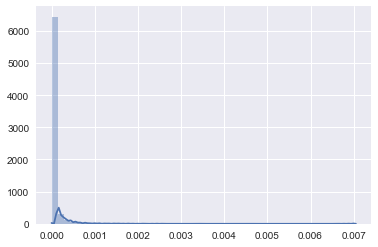

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df_idf_filter.mean())
plt.show()

In [341]:
df_idf_filter.mean()[df_idf_filter.mean()>0.002].keys().values  #54

(array(['amount', 'at', 'be', 'all', 'had', 'are', 'have', 'this',
        'motion', 'was', 'under', 'united', 'no', 'from', 'by', 'case',
        'with', 'property', 'which', 'court', 'debtor', 'chapter', 'may',
        'were', 'the', 'any', 'on', 'that', 'bankruptcy', 'for', 'been',
        'their', 'claim', 'other', 'is', 'of', 'not', 'its', 'and',
        'trustee', 'order', 'an', 'would', 'his', 'to', 'pursuant',
        'interest', 'it', 'if', 'as', 'in', 'or', 'such', 'law'],
       dtype=object), 54)

In [342]:
df_idf_filter.mean()[df_idf_filter.mean()>0.0015].keys().values

(array(['further', 'amount', 'at', 'be', 'does', 'all', 'had', 'first',
        'are', 'have', 'estate', 'this', 'based', 'one', 'motion', 'was',
        'hearing', 'under', 'whether', 'plan', 'united', 'against', 'no',
        'from', 'before', 'by', 'plaintiff', 'case', 'however', 'petition',
        'with', 'property', 'they', 'only', 'which', 'court', 'debtor',
        'over', 'chapter', 'may', 'made', 'after', 'were', 'but',
        'because', 'the', 'did', 'than', 'any', 'on', 'creditor', 'will',
        'that', 'time', 'bankruptcy', 'for', 'upon', 'been', 'their',
        'claim', 'other', 'judgment', 'between', 'act', 'judge', 'filing',
        'is', 'of', 'state', 'section', 'not', 'its', 'and', 'trustee',
        'there', 'order', 'when', 'an', 'would', 'issue', 'shall',
        'matter', 'his', 'to', 'these', 'relief', 'he', 'pursuant',
        'ordered', 'so', 'date', 'interest', 'it', 'if', 'also', 'as',
        'in', 'complaint', 'or', 'evidence', 'party', 'such', 'law'],

In [343]:
df_idf_filter.mean()[df_idf_filter.mean()>0.001].keys().values

(array(['agreement', 'forth', 'decision', 'further', 'debt', 'amount',
        'following', 'at', 'lien', 'be', 'does', 'both', 'all', 'had',
        'first', 'are', 'use', 'assets', 'sale', 'tax', 'have', 'value',
        'estate', 'then', 'proof', 'this', 'part', 'based', 'one',
        'dispute', 'opinion', 'motion', 'was', 'those', 'hearing', 'under',
        'should', 'whether', 'plan', 'title', 'legal', 'fact', 'united',
        'received', 'each', 'action', 'against', 'no', 'second', 'until',
        'from', 'march', 'before', 'by', 'plaintiff', 'new', 'through',
        'case', 'however', 'petition', 'with', 'notice', 'two', 'non',
        'property', 'period', 'they', 'only', 'which', 'court', 'debtor',
        'over', 'chapter', 'may', 'made', 'three', 'after', 'general',
        'were', 'but', 'because', 'the', 'file', 'did', 'than', 'any',
        'business', 'loan', 'code', 'year', 'result', 'on', 'another',
        'august', 'set', 'creditor', 'will', 'that', 'time', 'ban

In [347]:
#df_idf_filter.mean()[df_idf_filter.mean()>0.0005].keys().values
#df_idf_filter.mean()[df_idf_filter.mean()>0.0001].keys().values
#df_idf_filter.mean()[df_idf_filter.mean()>0.00005].keys().values

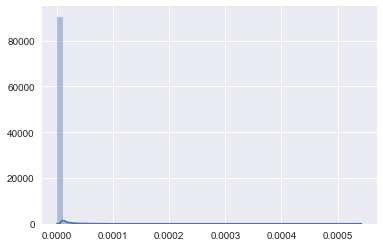

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df_idf_filter.var())
plt.show()